This python notebook is based on the book "Python for Finance: Mastering Data-Driven Finance" by Yves Hilpisch. In this particular notebook, I summarize the most important financial applications from the chapters 7 to 13 and add financial theory for a better (and easier) comprehension of the code.

Elaborated by: Francisco Arizola

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import math
import numpy.random as npr
import math
import warnings
import scipy.stats as scs

# Library for interactive 2D plotting
!pip install cufflinks plotly
import cufflinks as cf 
import plotly.offline as plyo

# Initialize plotly to work in offline mode
plyo.init_notebook_mode(connected=True)

# Optional: if you are using Jupyter Notebook, you might want to enable inline plotting
cf.go_offline()

# Interactive 2D Plotting

In [20]:
# We build a random data series (normal distribution)
a = np.random.standard_normal((250, 5)).cumsum(axis=0)

# Set dates as index column
index = pd.date_range('2019-1-1',
                      freq='B', # The frequency (“business daily”)
                      periods=len(a))

# Convert index to string to avoid deprecation warning
str_index = index.astype(str)

# Build data frame
df = pd.DataFrame(100 + 5 * a, columns=list('abcde'), index=index)

# See first few rows
df.head()

,a,b,c,d,e
2019-01-01,94.650201,92.487200,96.454966,100.013873,94.776469
2019-01-02,99.171373,95.741526,97.647779,100.385674,108.436732
2019-01-03,100.734009,98.734369,97.431802,106.935601,108.389136
2019-01-04,107.029523,102.891257,97.877094,116.583262,119.415300
2019-01-07,106.675172,111.712770,97.496511,125.146695,122.501435


C:\Users\Franc\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



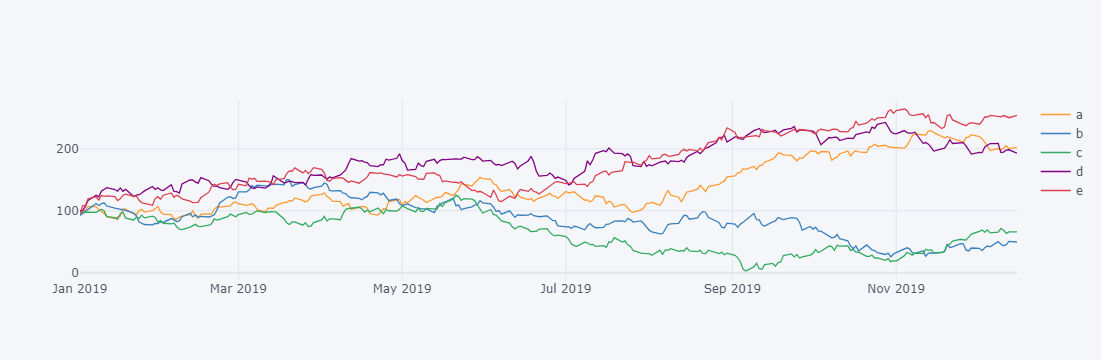

In [22]:
# Cufflinks adds a new method to the DataFrame class: df.iplot(). This method uses plotly in the backend to create 
# interactive plots.

plyo.iplot(               # This makes use of the offline (notebook mode) capabilities of plotly
df.iplot(asFigure=True),  # The df.iplot() method is called with parameter asFigure=True to allow for local plotting and embedding.
image='png',              # The image option provides in addition a static bitmap version of the plot. 
filename='ply_01'         # The filename for the bitmap to be saved is specified (the file type extension is added automatically)
)

C:\Users\Franc\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



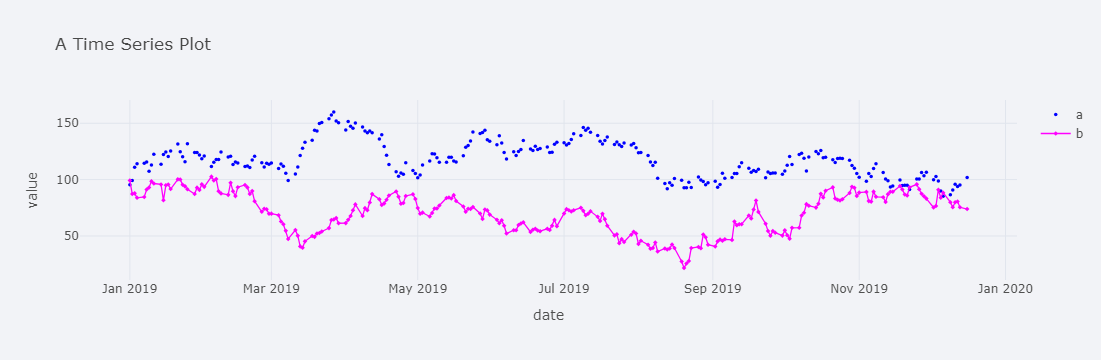

In [14]:
# 
plyo.iplot(
 df[['a', 'b']].iplot(asFigure=True,           # We only plot columns 'a' and 'b'
 theme='polar',
 title='A Time Series Plot',
 xTitle='date',
 yTitle='value',
 mode={'a': 'markers', 'b': 'lines+markers'},  # Define the style of the series
 symbol={'a': 'circle', 'b': 'diamond'},       # Symbols of the markers
 size=3.5,
 colors={'a': 'blue', 'b': 'magenta'},
 ),
 image='png',
 filename='ply_02'
)

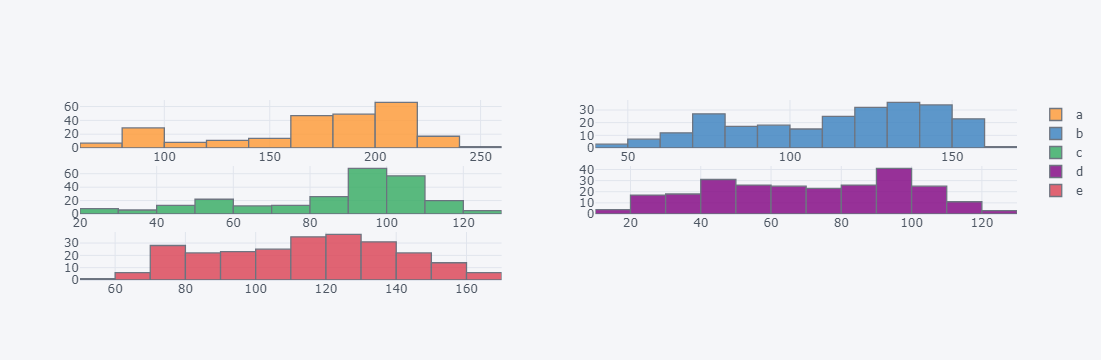

In [13]:
# Histogram example
plyo.iplot(
 df.iplot(kind='hist',  # Specifies the plotting type
 subplots=True,         # Requires separate subplots for every column
 bins=15,               # Sets the bins parameter (buckets to be used = bars to be plotted)
 asFigure=True),
 image='png',
 filename='ply_03'
 )

## Financial Plots

This subsection uses a real financial data set, time series data for the EUR/USD exchange rate (source: FXCM Forex Capital Markets Ltd.)

In [36]:
# Import the data
raw = pd.read_csv('../source/fxcm_eur_usd_eod_data.csv', index_col=0)
raw.index = raw.index.astype(str)

# Print first few rows
raw.head()

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
2013-01-01 22:00:00,1.31848,1.32935,1.31563,1.31850,1.31853,1.32940,1.31571,1.31860
2013-01-02 22:00:00,1.31850,1.31903,1.30468,1.30483,1.31860,1.31910,1.30471,1.30501
2013-01-03 22:00:00,1.30483,1.30897,1.29974,1.30679,1.30501,1.30898,1.29978,1.30697
2013-01-06 22:00:00,1.30679,1.31194,1.30168,1.31159,1.30697,1.31196,1.30168,1.31166
2013-01-07 22:00:00,1.31159,1.31398,1.30563,1.30805,1.31166,1.31400,1.30565,1.30815


In [38]:
# View data information to look for any missing values
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1547 entries, 2013-01-01 22:00:00 to 2017-12-31 22:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1547 non-null   float64
 1   BidHigh   1547 non-null   float64
 2   BidLow    1547 non-null   float64
 3   BidClose  1547 non-null   float64
 4   AskOpen   1547 non-null   float64
 5   AskHigh   1547 non-null   float64
 6   AskLow    1547 non-null   float64
 7   AskClose  1547 non-null   float64
dtypes: float64(8)
memory usage: 108.8+ KB


In [40]:
# We take the relevant columns and display only the last 60 rows for visualization
quotes = raw[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']]
quotes = quotes.iloc[-60:]
quotes.tail()

,AskOpen,AskHigh,AskLow,AskClose
2017-12-25 22:00:00,1.18667,1.18791,1.18467,1.18587
2017-12-26 22:00:00,1.18587,1.19104,1.18552,1.18885
2017-12-27 22:00:00,1.18885,1.19592,1.18885,1.19426
2017-12-28 22:00:00,1.19426,1.20256,1.19369,1.20092
2017-12-31 22:00:00,1.20092,1.20144,1.19994,1.20144


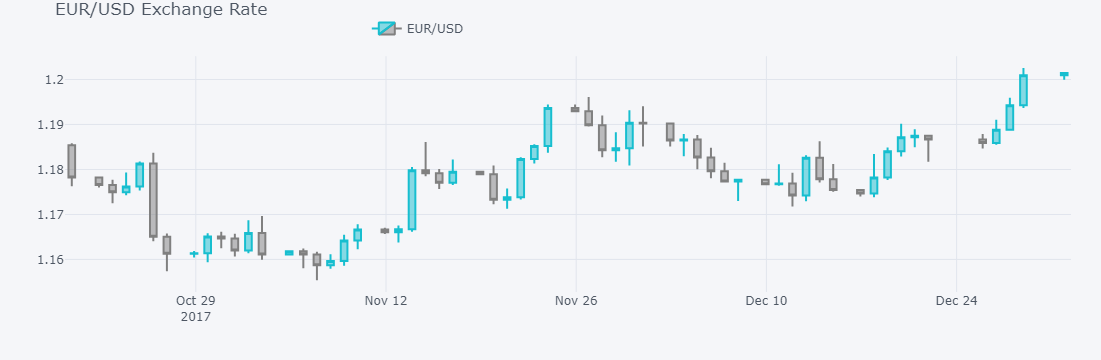

In [42]:
# QuantFig object takes the DataFrame object as input and allows for some basic customization
qf = cf.QuantFig(
 quotes,
 title='EUR/USD Exchange Rate',
 legend='top',
 name='EUR/USD'
 )

# Then with qf.iplot() we plot the data
plyo.iplot(
 qf.iplot(asFigure=True),
 image='png',
 filename='qf_01'
 )

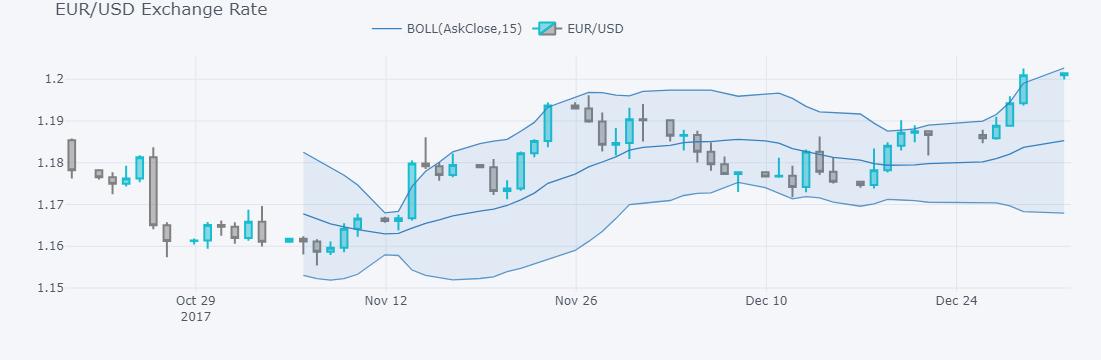

In [44]:
# We can add typical financial charting elements, such as Bollinger bands
qf.add_bollinger_bands(periods=15 # The number of periods for the Bollinger band.
                       ,boll_std=2) # The number of standard deviations to be used for the band width

plyo.iplot(qf.iplot(asFigure=True),
 image='png',
 filename='qf_02'
 )

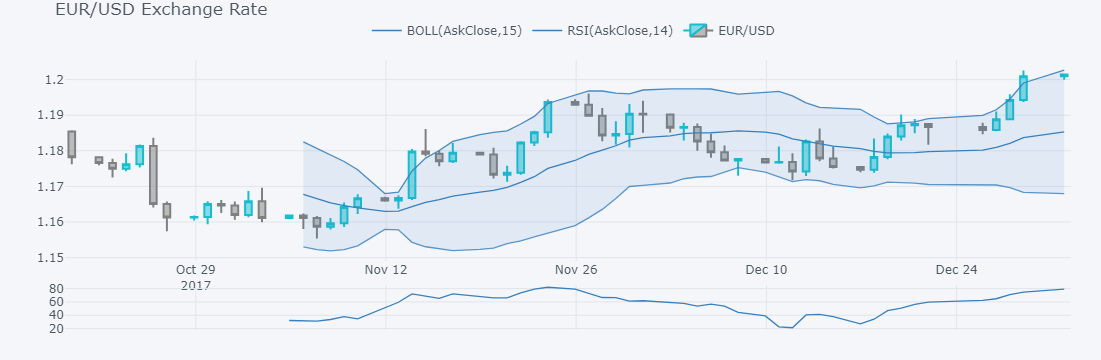

In [46]:
# We can also add certain financial indicators, such as RSI as subplots
qf.add_rsi(periods=14,
           showbands=False)

plyo.iplot(
 qf.iplot(asFigure=True),
 image='png',
 filename='qf_03'
)

The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security. Generally, when the RSI indicator crosses 30 on the RSI chart, it is a bullish sign and when it crosses 70, it is a bearish sign.

# Financial Time Series

In [27]:
# Load data
data = pd.read_csv('../source/tr_eikon_eod_data.csv',
                   index_col=0, # Specifies that the first column shall be handled as an index
                   parse_dates=True) # Specifies that the index values are of type datetime

# See top rows
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [29]:
# Describe the general statistics from the data.
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In some scenarios, log returns are easier to handle and therefore often preferred in a financial context. One major advantage over simple returns is additivity over time:

For log returns, the sum of returns over multiple periods is equal to the return computed over the entire period. If you have log returns for two periods, $r_1$ and $r_2$, the log return for the combined period is $r_1 + r_2$.

Mathematically:

$ r_{1 \rightarrow 3} = \ln\left(\frac{P_3}{P_1}\right) = \ln\left(\frac{P_3}{P_2} \cdot \frac{P_2}{P_1}\right) = \ln\left(\frac{P_3}{P_2}\right) + \ln\left(\frac{P_2}{P_1}\right) = r_2 + r_1 $

This property makes it easier to handle log returns when analyzing cumulative returns over multiple periods.

In [32]:
# We calculate the log returns
rets = np.log(data / data.shift(1))
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


<Axes: xlabel='Date'>

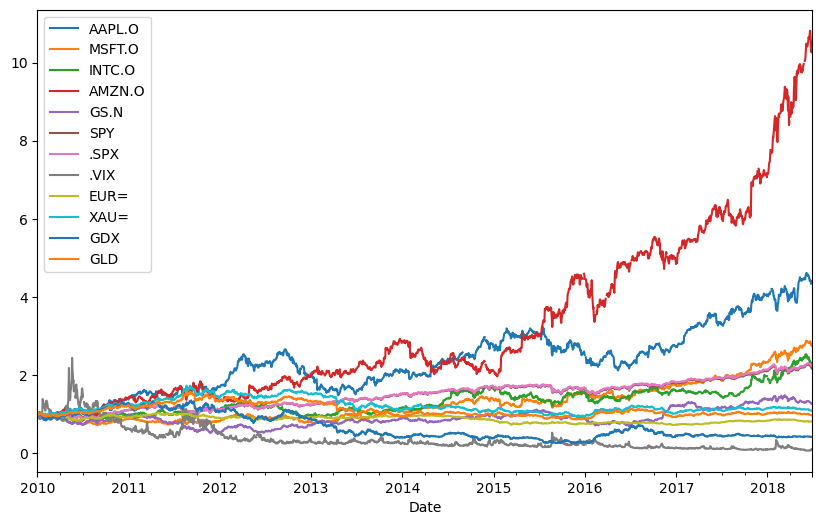

In [34]:
# We plot the aggregated log returns using the cumsum() function and the property of the log returns
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations.

In [24]:
# Resample the data to weekly time intervals
data.resample('1w', label='right').last().head() # Using label 'right' to avoid foresight bias

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


## Rolling Statistics

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true.

In [27]:
# Keep only one asset (AAPL)
sym = 'AAPL.O'
data = pd.DataFrame(data['AAPL.O']).dropna()

# Short term SMA
data['SMA1'] = data[sym].rolling(window=42).mean()

# Long term SMA
data['SMA2'] = data[sym].rolling(window=252).mean()

# Display the last rows of the new data frame
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


In [30]:
# Plot the time series with the SMAs (interactive plotting)
plyo.iplot(
 data.iplot(asFigure=True),
 image='png',
 filename='qf_04'
 )

## Correlation Analysis

This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated.

In [31]:
# Load the data
raw = pd.read_csv('../source/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)

# Keep the relevant columns and drop missing values
data = raw[['.SPX', '.VIX']].dropna()

data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


In [32]:
# Calculate logarithmic returns
rets = np.log(data / data.shift(1))
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


<Axes: xlabel='Date'>

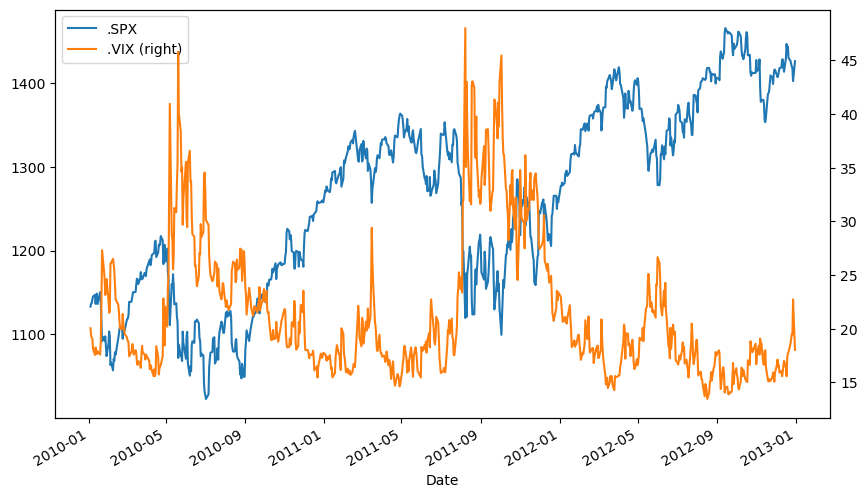

In [40]:
# When plotting the two time series in a single plot and with adjusted scalings, the stylized fact of negative correlation 
# between the two indices becomes evident
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6))

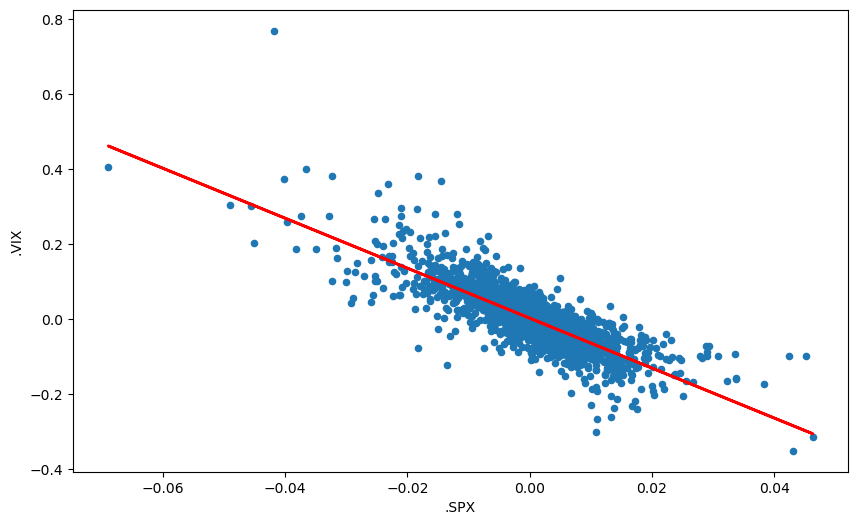

In [33]:
# Drop missing values
rets.dropna(inplace=True)

# We run an OLS regression
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)

# We plot the log returns as scatter plot
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))

# We add the linear regression line
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)

In [34]:
# We can directly measure the correlation and corroborate
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


# Option Valuation

## Binomial Trees

The **binomial option pricing model** is a numerical method used to value options. Developed by Cox, Ross, and Rubinstein in 1979, this method represents the future evolution of an asset's price using a binomial tree. Here's a detailed explanation:

#### Key Concepts:

##### Tree Representation
- The model uses a **binomial tree** to represent possible future movements of the asset price.
- Each node in the tree represents a potential price at a specific point in time.

##### Risky and Riskless Assets
- **Risky Asset**: Typically a stock or index with uncertain price movements.
- **Riskless Asset**: Usually a bond or other risk-free investment that grows at a constant rate $r$.

##### Time Intervals
- The time from the present until the option's maturity is divided into **equidistant subintervals** of length $\Delta t$.

##### Price Movements
- At each time step, the price of the asset can either:
  - **Increase**: The price at time $t$ is $S_{t} = S_{s} \cdot u$.
  - **Decrease**: The price at time $t$ is $S_{t} = S_{s} \cdot d$.
- Here, $S_{s}$ is the price at the current time $s$, and $S_{t}$ is the price at time $t$.

##### Factors $u$ and $d$
- **Up Factor $u$**: The factor by which the price increases, calculated as $u = e^{\sigma \sqrt{\Delta t}}$, where $\sigma$ is the volatility.
- **Down Factor $d$**: The factor by which the price decreases, calculated as $d = \frac{1}{u}$.
- These factors ensure $0 < d < e^{r \Delta t} < u$, where $e^{r \Delta t}$ is the growth factor of the risk-free asset.
- Additionally, $u = \frac{1}{d}$ to ensure the tree is recombining.

##### Risk-Free Rate
- $r$ is the constant **risk-free short rate**, the rate of return on a risk-free asset.

#### Example Calculation:

Suppose:
- Current stock price is $S_{s}$.
- Up factor $u = e^{\sigma \sqrt{\Delta t}}$.
- Down factor $d = \frac{1}{u}$.

In one time step of length $\Delta t$:
- The stock price can increase to $S_{t} = S_{s} \cdot u$.
- The stock price can decrease to $S_{t} = S_{s} \cdot d$.

By constructing and analyzing the binomial tree, you can work backward from the option's expiry to today to determine its value.

This model is valued for its simplicity and intuitive approach compared to more complex models like Black-Scholes.

In [42]:
# Define parameters
S0 = 36 # Initial value of the risky asset
T = 1.0 # Time horizon for the binomial tree simulation
r = 0.06 # Constant short rate
sigma = 0.2 # Constant volatility factor

In [43]:
# Function for binomial tree
def simulate_tree(M):
 dt = T / M # Length of time intervals
 u = math.exp(sigma * math.sqrt(dt)) # Factor for the upward movements
 d = 1 / u # Factor for the downward movements
 S = np.zeros((M + 1, M + 1))
 S[0, 0] = S0
 z = 1
 for t in range(1, M + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
 return S

In [44]:
# Set 'print' options with two decimals
np.set_printoptions(formatter={'float':
                                 lambda x: '%6.2f' % x})

# Tree with 4 time intervals
simulate_tree(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [45]:
# Tree with 500 time intervals.
%time simulate_tree(500)

CPU times: total: 188 ms
Wall time: 208 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

## Monte Carlo Simulation

This section analyzes the Monte Carlo simulation of the geometric Brownian motion, a simple yet still widely used stochastic process to model the evolution of stock prices or index levels. Among others, the Black-Scholes-Merton (1973) theory of option pricing draws on this process. In their setup, the underlying of the option to be valued follows the stochastic differential equation (SDE), as seen in Equation 10-1. $S_t$ is the value of the underlying at time $t$; $r$ is the constant, riskless short rate; $\sigma$ is the constant instantaneous volatility; and $Z_t$ is a Brownian motion.

#### Equation 10-1. Black-Scholes-Merton SDE (geometric Brownian motion)
$$
dS_t = r S_t dt + \sigma S_t dZ_t
$$

##### Interpretation:

- **Drift Term ($ \mu S_t dt $)**: This term represents the deterministic part of the price change, contributing to the average growth rate of the asset over time.
- **Volatility Term ($ \sigma S_t dZ_t $)**: This term introduces randomness into the price change, capturing the unpredictable fluctuations due to market forces.

#### Equation 10-2. Black-Scholes-Merton difference equation (Euler scheme)

The previous SDE can be discretized over equidistant time intervals and simulated according to Equation 10-2, which represents an Euler scheme. In this case, $z$ is a standard normally distributed random number. For $M$ time intervals, the length of the time interval is given as $\Delta t = \frac{T}{M}$, where $T$ is the time horizon for the simulation (for example, the maturity date of an option to be valued).

$$
S_t = S_{t - \Delta t} \exp \left( \left( r - \frac{\sigma^2}{2} \right) \Delta t + \sigma \sqrt{\Delta t} \, z \right)
$$

#### Key Concepts:

##### Geometric Brownian Motion (GBM)
- GBM is a stochastic process used to model stock prices.
- The process assumes continuous compound growth with a drift term ($r$) and a volatility term ($\sigma$).
- **Drift**: This represents the average rate of return of the asset, often denoted by $ \mu $ or $ r $. It accounts for the deterministic trend in the price movement.
- **Volatility**: Represented by $ \sigma $, this measures the degree of randomness or uncertainty in the price movement. Higher volatility indicates greater uncertainty and larger potential price swings.

##### Monte Carlo Simulation
- A method to simulate the potential future outcomes of a GBM by generating a large number of random paths.
- Each path represents a possible evolution of the stock price over time.

##### Stochastic Differential Equation (SDE)
- The SDE for GBM is given by Equation 10-1.
- This equation describes the continuous change in the stock price, incorporating both the deterministic trend and the stochastic volatility.

##### Discretization and Euler Scheme
- To simulate GBM, the continuous SDE is discretized using the Euler scheme.
- The discretized equation (Equation 10-2) allows for the numerical simulation of stock prices over discrete time intervals.

The Monte Carlo estimator for a European call option is a method used to estimate the option's price using simulated paths of the underlying asset's price. This approach relies on generating a large number of potential future price paths and then averaging the payoff of the option across these paths. The key formula for the Monte Carlo estimator is given by Equation 10-3.

#### Equation 10-3. Monte Carlo Estimator for European Call Option

$$
C_0 = e^{-rT} \frac{1}{I} \sum_{i=1}^{I} \max(S_T^{(i)} - K, 0)
$$

##### Explanation

- **$C_0$**: The estimated price of the European call option at time 0.
- **$e^{-rT}$**: The discount factor, which accounts for the time value of money. Here, $r$ is the risk-free rate, and $T$ is the time to maturity.
- **$I$**: The total number of simulated paths.
- **$S_T^{(i)}$**: The $i$-th simulated value of the underlying asset at maturity $T$.
- **$K$**: The strike price of the option.
- **$\max(S_T^{(i)} - K, 0)$**: The payoff of the call option for the $i$-th simulated path. This represents the intrinsic value of the option, which is the positive difference between the asset price at maturity and the strike price, or zero if the difference is negative.

In [46]:
M = 100 # The number of time intervals for discretization.
I = 50000 # The number of paths to be simulated.

# Function for Monte Carlo simulation
def mcs_simulation_py(p):
 M, I = p
 dt = T / M
 S = np.zeros((M + 1, I))
 S[0] = S0
 rn = np.random.standard_normal(S.shape)
 #The nested loop implementing the simulation based on the Euler scheme.
 for t in range(1, M + 1):
     for i in range(I):
         S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt + sigma * math.sqrt(dt) * rn[t, i])
 return S

In [49]:
%time S = mcs_simulation_py((M, I))
display(S)

CPU times: total: 5.02 s
Wall time: 5.6 s


array([[ 36.00,  36.00,  36.00, ...,  36.00,  36.00,  36.00],
       [ 37.40,  36.13,  37.12, ...,  35.62,  35.97,  36.50],
       [ 37.56,  35.69,  37.88, ...,  35.10,  36.23,  36.50],
       ...,
       [ 48.28,  34.43,  37.97, ...,  56.15,  40.13,  32.79],
       [ 49.25,  34.73,  38.51, ...,  55.20,  40.12,  32.48],
       [ 48.30,  35.20,  38.50, ...,  56.14,  40.62,  32.41]])

In [51]:
# See further results
print('Mean end-of-period value based on the simulation:',S[-1].mean())
print('Theoretically expected end-of-period value:',S0 * math.exp(r * T))

Mean end-of-period value based on the simulation: 38.26420414208046
Theoretically expected end-of-period value: 38.22611567563295


In [53]:
# The strike price of the European put option
K = 40

# The Monte Carlo estimator for the option
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()

print('Monte Carlo estimator for the option:',C0)

Monte Carlo estimator for the option: 3.838493732071469


## Valuation

### European Options

One of the most important applications of Monte Carlo simulation is the valuation of contingent claims (options, derivatives, hybrid instruments, etc.). Simply stated, in a risk-neutral world, the value of a contingent claim is the discounted expected payoff under the risk-neutral (martingale) measure. This is the probability measure that makes all risk factors (stocks, indices, etc.) drift at the riskless short rate, making the discounted processes martingales. According to the Fundamental Theorem of Asset Pricing, the existence of such a probability measure is equivalent to the absence of arbitrage. A financial option embodies the right to buy (call option) or sell (put option) a specified financial instrument at a given maturity date (European option), or over a specified period of time (American option), at a given price (strike price).

##### Equation 12-10. Pricing by risk-neutral expectation

$$
C_0 = e^{-rT} \mathbb{E}_0^Q (h(S_T)) = e^{-rT} \int_0^\infty h(s) q(s) ds
$$

- $C_0$: The price of the European call option at time 0
- $r$: Constant risk-free rate
- $T$: Time to maturity
- $h(S_T)$: Payoff function of the option at maturity
- $\mathbb{E}_0^Q$: Expectation under the risk-neutral measure
- $q(s)$: Risk-neutral probability density function

Chapter 11 sketches how to numerically evaluate an integral by Monte Carlo simulation. This approach is used in the following and applied to Equation 12-10. Equation 12-11 provides the respective Monte Carlo estimator for the European option, where $\hat{S}_T^i$ is the $i$th simulated index level at maturity.

##### Equation 12-11. Risk-neutral Monte Carlo estimator

$$
\hat{C}_0 = e^{-rT} \frac{1}{I} \sum_{i=1}^I h(\hat{S}_T^i)
$$

- $\hat{C}_0$: The Monte Carlo estimate of the option price
- $I$: Total number of simulated paths
- $\hat{S}_T^i$: The $i$th simulated value of the index level at maturity
- $h(\hat{S}_T^i)$: Payoff function of the $i$th simulated path at maturity

Consider now the following parameterization for the geometric Brownian motion and the valuation function `gbm_mcs_stat()`, taking as a parameter only the strike price. Here, only the index level at maturity is simulated. As a reference, consider the case with a strike price of $K = 105$.

In [54]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
 ''' Function to generate random numbers for simulation.
 Parameters
 ==========
 M: int
 number of time intervals for discretization
 I: int
 number of paths to be simulated
 anti_paths: boolean
 use of antithetic variates
 mo_math: boolean
 use of moment matching
 '''
 if anti_paths is True:
     sn = npr.standard_normal((M + 1, int(I / 2)))
     sn = np.concatenate((sn, -sn), axis=1)
 else:
     sn = npr.standard_normal((M + 1, I))
 if mo_match is True:
     sn = (sn - sn.mean()) / sn.std()
 return sn

In [55]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

def gbm_mcs_stat(K):
 ''' Valuation of European call option in Black-Scholes-Merton
 by Monte Carlo simulation (of index level at maturity)
 Parameters
 ==========
 K: float (positive) strike price of the option
 Returns
 =======
 C0: float estimated present value of European call option
 '''
 sn = gen_sn(1, I)
 # simulate index level at maturity
 ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * sn[1])
 # calculate payoff at maturity
 hT = np.maximum(ST - K, 0)
 # calculate MCS estimator
 C0 = math.exp(-r * T) * np.mean(hT)
 return C0

gbm_mcs_stat(K=105.) # The Monte Carlo estimator value for the European call option

10.008898524719841

In [56]:
M = 50 # Number of time intervals

# Now, we consider both put and call options
def gbm_mcs_dyna(K, option='call'):
 ''' Valuation of European options in Black-Scholes-Merton
 by Monte Carlo simulation (of index level paths)
 Parameters
 ==========
 K: float
 (positive) strike price of the option
 option : string
 type of the option to be valued ('call', 'put')
 Returns
 =======
 C0: float
 estimated present value of European call option
 '''
 dt = T / M
 # simulation of index level paths
 S = np.zeros((M + 1, I))
 S[0] = S0
 sn = gen_sn(M, I)
 for t in range(1, M + 1):
     S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])
 # case-based calculation of payoff
 if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
 else:
        hT = np.maximum(K - S[-1], 0)
 # calculation of MCS estimator
 C0 = math.exp(-r * T) * np.mean(hT)
 return C0

In [57]:
# Test call and put cases
print('The simulated call option value is:',gbm_mcs_dyna(K=110., option='call'))
print('The simulated put option value is:',gbm_mcs_dyna(K=110., option='put'))

The simulated call option value is: 8.036004129500936
The simulated put option value is: 12.632492097152866


In [58]:
from scipy.stats import norm

def bsm_call_value(S0, K, T, r, sigma):
    """
    Calculates the Black-Scholes-Merton call option value.
    
    Parameters:
    S0 : float
        Initial stock/index level
    K : float
        Strike price
    T : float
        Time to maturity (in year fractions)
    r : float
        Constant risk-free short rate
    sigma : float
        Volatility of the underlying asset
        
    Returns:
    value : float
        Present value of the European call option
    """
    d1 = (math.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    value = (S0 * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2))
    return value

In [59]:
S0 = 100  # Initial stock/index level
K = 105   # Strike price
T = 1.0   # Time to maturity (in year fractions)
r = 0.05  # Constant risk-free short rate
sigma = 0.2  # Volatility of the underlying asset

bsm_call_value(S0, K, T, r, sigma)

8.021352235143176

### American Options

The valuation of American options is more involved compared to European options. In this case, an **optimal stopping problem** has to be solved to come up with a fair value of the option. 

Equation 12-12 formulates the valuation of an American option as such a problem. The problem formulation is already based on a discrete time grid for use with numerical simulation. In a sense, it is therefore more correct to speak of an option value given Bermudan exercise. For the time interval converging to zero length, the value of the Bermudan option converges to the one of the American option.

##### Equation 12-12. American option prices as optimal stopping problem
$$
V_0 = \sup_{\tau \in (0, \Delta t, 2\Delta t, \ldots, T)} \mathbb{E}_0 \left[ e^{-rT} h_\tau(S_\tau) \right]
$$

- $V_0$: The value of the American option at the initial time.
- $\tau$: The stopping time, which is chosen to maximize the expected payoff.
- $\mathbb{E}_0$: The expectation operator under the risk-neutral measure.
- $e^{-rT}$: The discount factor, where $r$ is the constant risk-free short rate and \(T\) is the time to maturity.
- $h_\tau(S_\tau)$: The payoff function at stopping time $\tau$, where $S_\tau$ is the underlying asset price at time $\tau$.

The algorithm described in the following is called **Least-Squares Monte Carlo (LSM)** and is from the paper by Longstaff and Schwartz (2001). It can be shown that the value of an American (Bermudan) option at any given date \(t\) is given as:

$$
V_t(s) = \max \left( h_t(S_t), \mathbb{E}_t \left[ e^{-r \Delta t} V_{t + \Delta t}(S_{t + \Delta t}) \mid S_t = s \right] \right)
$$

where $C_t(s) = \mathbb{E}_t \left[ e^{-r \Delta t} V_{t + \Delta t}(S_{t + \Delta t}) \mid S_t = s \right]$ is the so-called **continuation value** of the option given an index level of $S_t = s$.

Given a set of basis functions $b_d, d = 1, \ldots, D$, the continuation value is then given by the regression estimate:

$$
C_t(S_t) = \sum_{j=1}^D \alpha_j \cdot b_j(S_t)
$$

The optimal regression parameters \(\alpha\) are the solution of the least-squares problem stated in Equation 12-13.

##### Equation 12-13. Least-squares regression for American option valuation
$$
\min_{\alpha} \frac{1}{I} \sum_{i=1}^I \left( Y_{i,t} - \sum_{j=1}^D \alpha_j \cdot b_j(S_{i,t}) \right)^2
$$

- $\alpha_j$: Regression coefficients for the basis functions $b_j(S_t)$.
- $Y_{i,t} \equiv e^{-r \Delta t} V_{t + \Delta t}(S_{i, t + \Delta t})$: Simulated continuation value for path \(i\) at time \(t\).
- $S_{i,t}$: Index level for path $i$ at time $t$.
- $I$: Total number of simulated paths.

This approach uses a cross-section of simulated continuation values to estimate the expected (continuation) value by least-squares regression.

In [61]:
# LSM algorithm for both American call and put options
def gbm_mcs_amer(K, option='call'):
    ''' 
    Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm

    Parameters
    ==========
    K: float
       (positive) strike price of the option
    option: string
       type of the option to be valued ('call', 'put')

    Returns
    =======
    C0: float
       estimated present value of American call option
    '''
    # Set up parameters for time step and discount factor
    dt = T / M
    df = math.exp(-r * dt)

    # Initialize the array for simulated index levels
    S = np.zeros((M + 1, I))
    S[0] = S0

    # Generate random numbers for the simulation
    sn = gen_sn(M, I)

    # Simulate index levels over time
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])

    # Calculate payoff based on option type
    if option == 'call':
        h = np.maximum(S - K, 0)  # Payoff for call option
    else:
        h = np.maximum(K - S, 0)  # Payoff for put option

    # LSM algorithm
    V = np.copy(h)  # Initialize value array with payoffs
    for t in range(M - 1, 0, -1):
        # Regression to estimate continuation values
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        # Update value array based on continuation value vs immediate exercise value
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])

    # Monte Carlo simulation estimator for present value
    C0 = df * np.mean(V[1])

    return C0

In [65]:
# Suppress RankWarning
warnings.simplefilter('ignore', np.RankWarning)

# Test call and put cases
print('The simulated call option value is:',gbm_mcs_amer(K=110., option='call'))
print('The simulated put option value is:',gbm_mcs_amer(K=110., option='put'))

The simulated call option value is: 5.883210732239027
The simulated put option value is: 11.894380288436828


The European value of an option represents a lower bound to the American option’s value. The difference is generally called the early exercise premium.

## Risk Measures

### Value-at-Risk (VaR)

VaR is a number denoted in currency units (e.g., USD, EUR, JPY) indicating a loss (of a portfolio, a single position, etc.) that is not exceeded with some confidence level (probability) over a given period of time.

Text(0, 0.5, 'frequency')

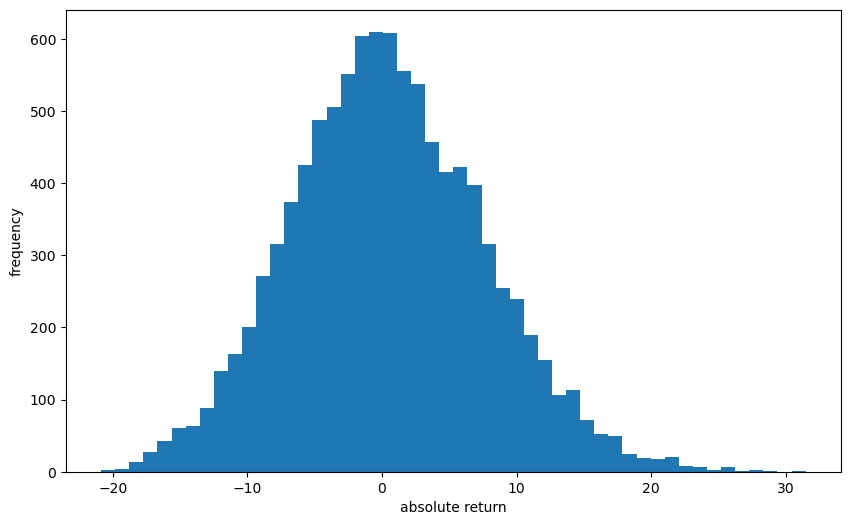

In [66]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365 # a period of 30 days
I = 10000

# Simulate end-of-period values for the geometric Brownian motion 
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))

# Calculate the absolute profits and losses per simulation run and sorts the values
R_gbm = np.sort(ST - S0)

# Plot
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')

In [69]:
# Print results in a table
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           20.716
           99.90           18.345
           99.00           15.410
           97.50           13.181
           95.00           11.031
           90.00            8.588


### Credit Valuation Adjustments

Other important risk measures are the **credit value-at-risk (CVaR)** and the **credit valuation adjustment (CVA)**, which is derived from the CVaR. 

Roughly speaking, CVaR is a measure for the risk resulting from the possibility that a counterparty might not be able to honor its obligations—for example, if the counterparty goes bankrupt. In such a case there are two main assumptions to be made: the probability of default and the (average) loss level.

In [70]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))

# Define the loss level
L = 0.5

# Define the probability of default
p = 0.01

# Simulate default events with a poisson distribution
D = npr.poisson(p * T, I)

# Limit defaults to one such event
D = np.where(D > 1, 1, D)

In [71]:
# Discounted average simulated value of the asset at T
math.exp(-r * T) * np.mean(ST)

100.12967494615481

In [72]:
# CVaR as the discounted average of the future losses in the case of a default
CVaR = math.exp(-r * T) * np.mean(L * D * ST)
CVaR

0.5042293512189182

In [73]:
# Current price of the asset adjusted by the simulated CVaR
S0_adj = S0 - CVaR
S0_adj

99.49577064878108

# Portfolio Theory

## Portfolio Optimization

The basic idea of MPT is to make use of diversification to achieve a minimal portfolio risk given a target return level or a maximum portfolio return given a certain level of risk.

In [74]:
# Load dataset
raw = pd.read_csv('../source/tr_eikon_eod_data.csv',index_col=0, parse_dates=True).dropna()
display(raw)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


In [93]:
# Keep instruments of interest
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']
data = raw[symbols]

# Define n° of assets
noa = len(symbols)

# Drop missing values
data.dropna(inplace=True)
display(data)

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660
...,...,...,...,...
2018-06-25,271.00,119.89,182.170000,98.390
2018-06-26,271.60,119.26,184.430000,99.080
2018-06-27,269.35,118.58,184.160000,97.540


<Axes: xlabel='Date'>

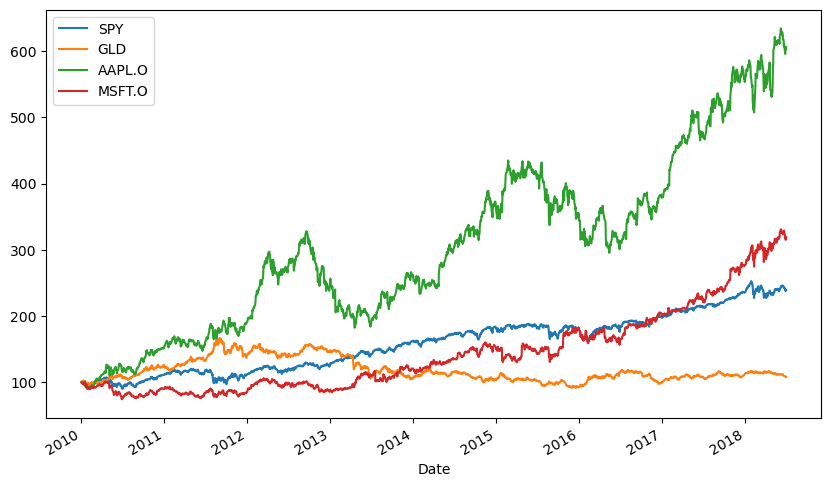

In [79]:
# Plot the time series
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

In [82]:
# Calculate logarithmic returns
rets = np.log(data / data.shift(1))
display(rets)

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807
...,...,...,...,...
2018-06-25,-0.013706,-0.003746,-0.014983,-0.020323
2018-06-26,0.002212,-0.005269,0.012330,0.006988
2018-06-27,-0.008319,-0.005718,-0.001465,-0.015665


In [83]:
# Annualized mean returns
rets.mean() * 252 # Working days (or financial operational days) in a year

SPY       0.102928
GLD       0.009141
AAPL.O    0.212359
MSFT.O    0.136648
dtype: float64

In [84]:
# Annualized covariance matrix
rets.cov() * 252

,SPY,GLD,AAPL.O,MSFT.O
SPY,0.021939,0.000062,0.021039,0.022244
GLD,0.000062,0.026209,0.001513,-0.000347
AAPL.O,0.021039,0.001513,0.063773,0.023427
MSFT.O,0.022244,-0.000347,0.023427,0.050917


In [87]:
weights = np.random.random(4) # Random portfolio weights
weights /= np.sum(weights) # Normalized it to 1 (or 100%)
print('The arbitrary initial weights are:',weights)
print('The sum of weights is (and must be):',weights.sum())

The arbitrary initial weights are: [  0.19   0.43   0.23   0.15]
The sum of weights is (and must be): 1.0


##### Equation 13-1. General formula for expected portfolio return

$$
\mu_p = E\left(\sum_{i=1}^{I} w_i r_i \right) = \sum_{i=1}^{I} w_i E(r_i) = \sum_{i=1}^{I} w_i \mu_i = w^T \mu
$$

In [88]:
# Annualized portfolio (expected) return given the weights
np.sum(rets.mean() * weights) * 252

0.0937838554393327

##### Equation 13-2. General formula for portfolio variance

$$
\sigma_p^2 = \sum_{i=1}^{I} \sum_{j=1}^{I} w_i w_j \sigma_{ij} = w^T \Sigma w
$$

In [89]:
# Annualized portfolio variance given the portfolio weights
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

# The np.dot() function gives the dot product of two vectors/matrices

0.015270164932508849

In [90]:
# Annualized portfolio volatility given the portfolio weights
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.12357250880559498

In [91]:
# The following implements a Monte Carlo simulation (see Chapter 12) to generate random portfolio weight vectors on a larger 
# scale. For every simulated allocation, the code records the resulting expected portfolio return and variance.

# Function to calculate portfolio return
def port_ret(weights):
 return np.sum(rets.mean() * weights) * 252

# Function to calculte portofolio volatility
def port_vol(weights):
 return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [95]:
prets = []
pvols = []

# Monte Carlo simulation of portfolio weights
for p in range (2500):
 weights = np.random.random(noa)
 weights /= np.sum(weights)
 # Collects the resulting statistics in list objects
 prets.append(port_ret(weights))
 pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

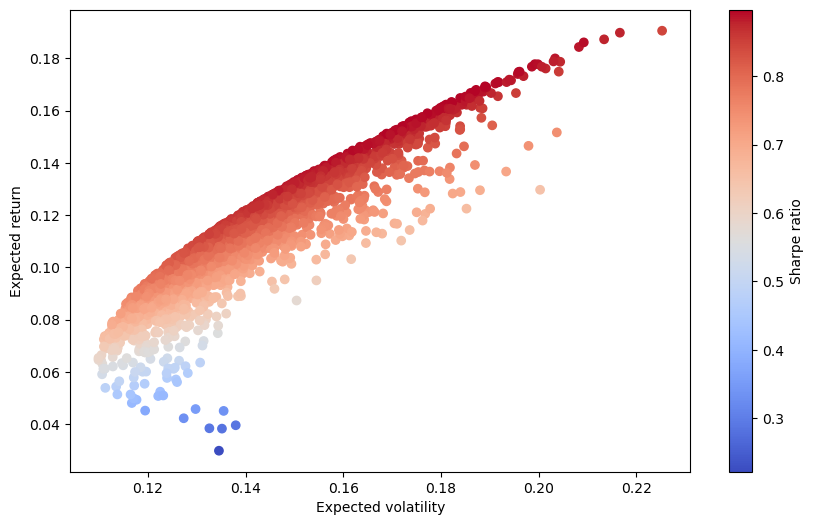

In [96]:
# Plot simulation results
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,marker='o', cmap='coolwarm')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

In addition, the graph, through color intensity, illustrates the sharpe ratio for the different portfolio combinations. The Sharpe ratio is a measure of risk-adjusted return. It indicates how much excess return you are receiving for the extra volatility that you endure for holding a riskier asset. A higher Sharpe ratio implies better risk-adjusted performance.

##### Equation 13-3. Sharpe Ratio

$$
\text{Sharpe Ratio} = \frac{E(R_p) - R_f}{\sigma_p}
$$

where:
- $E(R_p)$ is the expected return of the portfolio.
- $R_f$ is the risk-free rate.
- $\sigma_p$ is the standard deviation of the portfolio's excess return (a measure of risk).

As an investor, one is generally interested in the maximum return given a fixed risk level or the minimum risk given a fixed return expectation. This set of portfolios then makes up the so-called efficient frontier.

## Optimal Portfolios

In [97]:
# Library to optimize
import scipy.optimize as sco

In [98]:
# Keep in mind that to minimize the negative value of the sharpe ratio is the same as maximizing the positive value

# Function to be minimized
def min_func_sharpe(weights):
 return -port_ret(weights) / port_vol(weights)

# Equality constraint
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for the weights
bnds = tuple((0, 1) for x in range(noa))

# Weights vector
eweights = np.array(noa * [1. / noa,])
eweights

array([  0.25,   0.25,   0.25,   0.25])

In [99]:
# Maximize the sharpe ratio
min_func_sharpe(eweights)

-0.8436203363155395

In [101]:
# Optimization process
opts = sco.minimize(min_func_sharpe, eweights,
                     method='SLSQP', bounds=bnds,
                     constraints=cons)

# The optimal portfolio weights for the maximum sharpe ratio
opts['x'].round(3)

array([  0.26,   0.04,   0.51,   0.19])

In [102]:
# Print results of optimization (optimal portfolio with the highest sharpe ratio)
print("Portfolio expected return:",port_ret(opts['x']).round(3)) 
print("Portfolio volatility:",port_vol(opts['x']).round(3))
print("Portfolio Sharpe ratio:",port_ret(opts['x']) / port_vol(opts['x'])) # The maximum Sharpe ratio

Portfolio expected return: 0.161
Portfolio volatility: 0.18
Portfolio Sharpe ratio: 0.8976673894036445


In [103]:
# Optimal portfolio with the minimum global variance/volatility
# The minimization of the portfolio volatility
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

# Weights for maximum return given the volatility level
optv['x'].round(3)

array([  0.54,   0.46,   0.00,   0.00])

In [104]:
# Print results of optimization
print("Portfolio expected return:",port_ret(optv['x']).round(3)) 
print("Portfolio volatility:",port_vol(optv['x']).round(3))
print("Portfolio Sharpe ratio:",port_ret(optv['x']) / port_vol(optv['x'])) # The maximum Sharpe ratio

Portfolio expected return: 0.06
Portfolio volatility: 0.109
Portfolio Sharpe ratio: 0.5504173664702964


## Efficient Frontier

In [105]:
# The two binding constraints for the frontier
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for the weights
bnds = tuple((0, 1) for x in weights)

# Create vector for returns and volatility values
trets = np.linspace(0.05, 0.2, 50)
tvols = []

# The minimization of portfolio volatility for different target returns
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
    bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

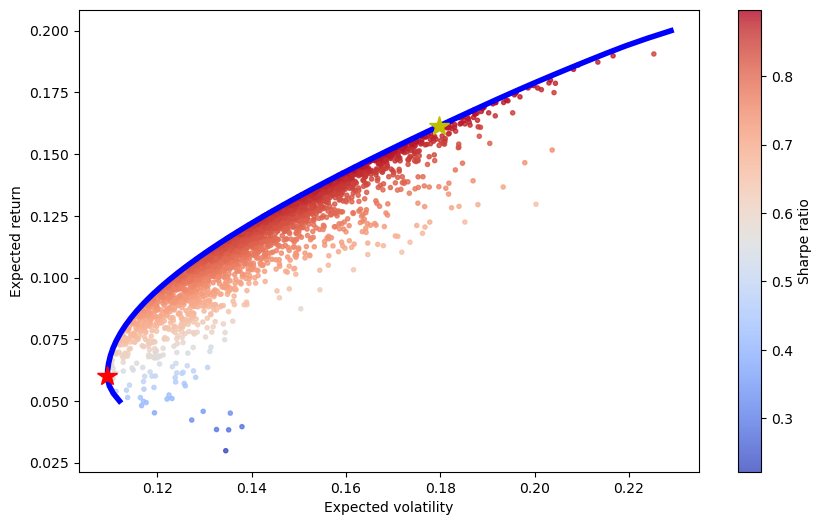

In [106]:
# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),'r*', markersize=15.0)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

The efficient frontier is comprised of all optimal portfolios with a higher return than the absolute minimum variance portfolio. These portfolios dominate all other portfolios in terms of expected returns given a certain risk level.

## Capital Market Line (CML)

However, in addition to risky assets, the financial markets also offer riskless assets that yield a lower return but need to be taken into consideration in the optimal portfolio selection process. 

The basic idea is that investors first determine an efficient portfolio of risky assets and then add the riskless asset to the mix. By adjusting the proportion of the investor’s wealth to be invested in the riskless asset it is possible to achieve any risk-return profile that lies on the straight line (in the risk-return space) between the riskless asset and the efficient risky portfolio.

In [107]:
import scipy.interpolate as sci

In [108]:
# Index position of minimum volatility portfolio
ind = np.argmin(tvols)

# Relevant portfolio volatility and return values
evols = tvols[ind:]
erets = trets[ind:]

# Cubic splines interpolation on these values
tck = sci.splrep(evols, erets) 

def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)


def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

Since there is no closed formula for the efficient frontier or the first derivative of it, one has to solve the system of equations in Equation 13-3 numerically. These are the conditions that the function needs to satisfy.

##### Equation 13-3. Mathematical conditions for capital market line

$$t(x) = a + b \cdot x$$

$$t(0) = r_f \iff a = r_f$$

$$t(x) = f(x) \iff a + b \cdot x = f(x)$$

$$t'(x) = f'(x) \iff b = f'(x)$$

In [110]:
# Create function that sets the system of equations
def equations(p, rf=0.01):
 eq1 = rf - p[0]
 eq2 = rf + p[1] * p[2] - f(p[2])
 eq3 = p[1] - df(p[2])
 return eq1, eq2, eq3

# Solving these equations for given initial values
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

# The optimal parameter values
opt

array([  0.01,   0.84,   0.20])

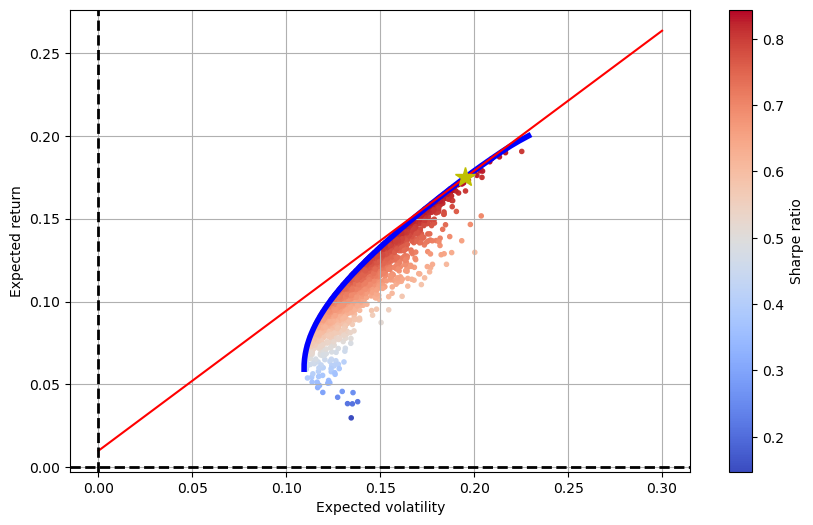

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

In [112]:
# Constraints
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - f(opt[2])},{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Find optimal weights
res = sco.minimize(port_vol, eweights, method='SLSQP',bounds=bnds, constraints=cons)
res['x'].round(3)

array([  0.19,   0.00,   0.59,   0.22])

In [113]:
# Print results of optimization
print("Portfolio expected return:",port_ret(res['x']).round(3)) 
print("Portfolio volatility:",port_vol(res['x']).round(3))
print("Portfolio Sharpe ratio:",port_ret(res['x']) / port_vol(res['x'])) # The maximum Sharpe ratio

Portfolio expected return: 0.175
Portfolio volatility: 0.195
Portfolio Sharpe ratio: 0.8959257895081519
